### Student Information
Name: 謝尚哲

Student ID: 114064545

GitHub ID: shangchehsieh

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

### 1. Data Preparation

In [129]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.utils import Bunch
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

needed_cols = ["text", "subjectivity", "polarity", "sentiment", "label"]
df = df[needed_cols].copy()

# Make sure each column has the correct data type and valid values
df["text"] = df["text"].astype(str)
df["subjectivity"] = pd.to_numeric(df["subjectivity"], errors="coerce")
df["polarity"] = pd.to_numeric(df["polarity"], errors="coerce")
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # ground truth: {-1.0, 0.0, 1.0}

# Keep only rows with valid labels
df = df[df["label"].isin([-1.0, 0.0, 1.0])].dropna(subset=["text"]).reset_index(drop=True)

# mapping for labels (-1, 0, 1 -> 0, 1, 2)
label_order = [-1.0, 0.0, 1.0]
categories = ["negative", "neutral", "positive"]
label_to_idx = {lab: i for i, lab in enumerate(label_order)}

# Build a sklearn friendly structure (Bunch)
X_text = df["text"].tolist()
y = df["label"].map(label_to_idx).to_numpy()

twenty_train = Bunch(
    data=X_text,             # list[str]
    target=y,                # np.ndarray of ints {0,1,2}
    target_names=categories  # ['negative','neutral','positive']
)

X = df[["text", "subjectivity", "polarity","sentiment", "label"]].copy()
X["label_idx"] = X["label"].map(label_to_idx)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aska9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. Data Transformation

#### 2.1 Converting Dictionary into Pandas Dataframe

In [130]:
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.
3,Vision Marine Technologies Inc. is rewriting t...
4,He didn’t say thank you.
...,...
842,Invest now it is going to shoot up tomorrow
843,Where can I read this?
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco..."
845,i sold my puts so i expect cheeto to declare w...


#### 2.2 Adding Columns

- Get the key value via `target`

In [131]:
X['sentiment'] = twenty_train.target
X

,text,sentiment
0,Calls on retards,0
1,Stunt as in like why did they even make a big ...,1
2,Seeing lots of red in the ticker.,1
3,Vision Marine Technologies Inc. is rewriting t...,2
4,He didn’t say thank you.,0
...,...,...
842,Invest now it is going to shoot up tomorrow,2
843,Where can I read this?,1
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1
845,i sold my puts so i expect cheeto to declare w...,0


- Get sentiment name from the key of sentiment

In [132]:
X['sentiment_name'] = X.sentiment.apply(lambda t: dmh.format_labels(t, twenty_train))
X

,text,sentiment,sentiment_name
0,Calls on retards,0,negative
1,Stunt as in like why did they even make a big ...,1,neutral
2,Seeing lots of red in the ticker.,1,neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,positive
4,He didn’t say thank you.,0,negative
...,...,...,...
842,Invest now it is going to shoot up tomorrow,2,positive
843,Where can I read this?,1,neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,neutral
845,i sold my puts so i expect cheeto to declare w...,0,negative


#### 2.3 Familiarizing yourself with the Data - fetch records belonging to "posivive" and query every 10th record. Only show the first 5 records.

In [133]:
X[X["sentiment_name"] == "positive"][::10][0:5]

,text,sentiment,sentiment_name
3,Vision Marine Technologies Inc. is rewriting t...,2,positive
78,I think it’s gonna work itself out. I bought t...,2,positive
168,The obvious can also be refreshing from CNBC: ...,2,positive
219,Same. Back to break even after that last rip b...,2,positive
319,Etrade has a feed of news articles about how r...,2,positive


### 3. Data Mining using Pandas

#### 3.1 Missing Values

- `.isnull()`: tranformed our table into the True/False table
- `.check_missing_values()`: looks through each field (attribute or column) in the dataset and counts how many missing values were found.

In [134]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


- I try to calculate the missing values in every record instead of every column.

In [135]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

- Insert "Dummy Series"

In [136]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "sentiment"])

In [137]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


-  drop the record with missing that we just added

In [138]:
X.dropna(inplace=True)

In [139]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sentiment,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 3.2 Dealing with Duplicate Data

In [140]:
sum(X.duplicated())

23

In [141]:
len(X) #before eliminating duplicate data

847

In [142]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [143]:
len(X) #after

813

## 4. Data Preprocessing
- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

### 4.1 Sampling

In [144]:
X_sample = X.sample(n=400) #random state

In [145]:
len(X_sample)

400

In [146]:
X_sample[0:4]

,text,sentiment,sentiment_name
805,$VXUS to answer your last question,1,neutral
197,Agolf Shittler or tangerine toddler.,0,negative
639,question -- if the dollar is 'falling' relativ...,1,neutral
702,what do you expect? it sells toilet papers.......,1,neutral


- To generate some visualizations, we are going to use `matplotlib` python library. With `matplotlib`, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. 

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
categories

['negative', 'neutral', 'positive']

- print `X` dataframe and its barchart

sentiment_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

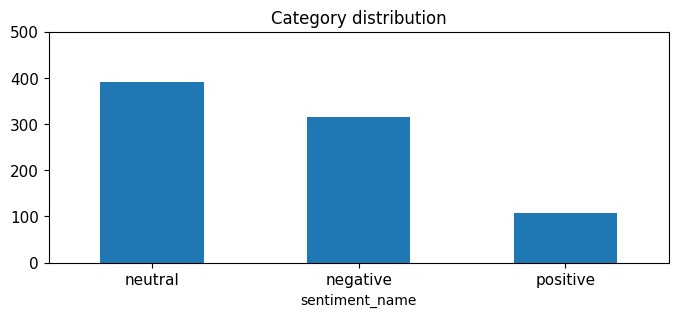

In [149]:
print(X.sentiment_name.value_counts())

# plot barchart for X
X.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

- print `X_sample` dataframe and its barchart

sentiment_name
neutral     210
negative    142
positive     48
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

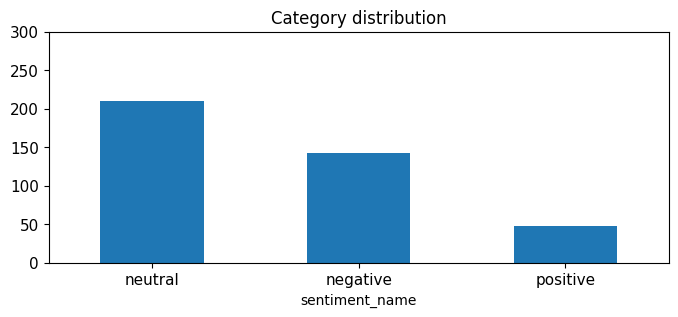

In [150]:
print(X_sample.sentiment_name.value_counts())

# plot barchart for X
X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

- Instead of hardcoding the maximum value for y, use `.value_counts()` and `.max()` to automate it

sentiment_name
neutral     210
negative    142
positive     48
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

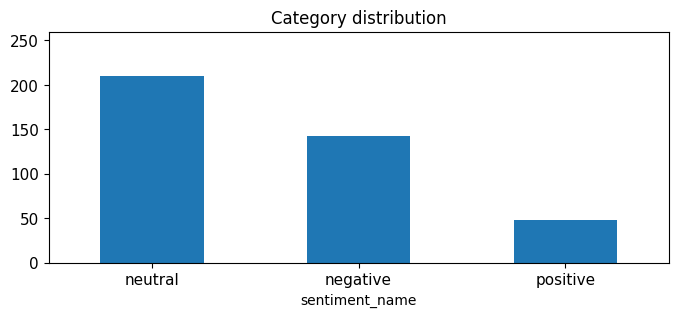

In [151]:
print(X_sample.sentiment_name.value_counts())

# plot barchart for X
X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, X_sample.sentiment_name.value_counts().max()+50],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

- Do a **side-by-side comparison** of the distribution between the two datasets

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment_name'>

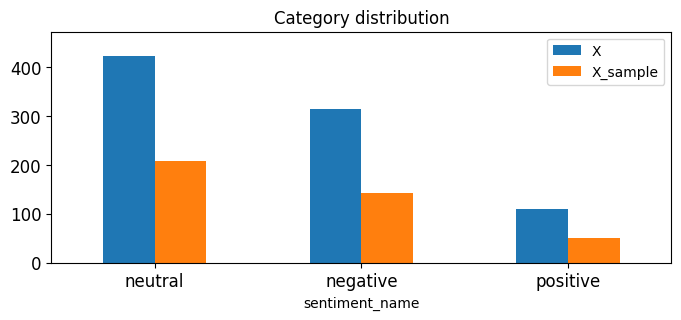

In [124]:
df_compare = pd.DataFrame({
    'X': X.sentiment_name.value_counts(), 
    'X_sample': X_sample.sentiment_name.value_counts()
})

# plot side-by-side barchart
df_compare.plot(kind = 'bar',
    title = 'Category distribution',
    ylim = [0, X.sentiment_name.value_counts().max()+50],
    rot = 0, fontsize = 12, figsize = (8,3))

#### 4.2 Feature Creation

- `Feature Engineering` :create some features from the text field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer.

In [125]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aska9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aska9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [153]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [154]:
X[0:4]

,text,sentiment,sentiment_name,unigrams
0,Calls on retards,0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,1,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,2,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [155]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

#### 4.3 Feature subset selection

- Feature extration with `CountVectorizer` from sklearn
- `CountVecorizer`: 1.tokenize and turn to all lowercase 2. vocabulary **3. calculate frequency**

In [156]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #詞頻矩陣(a sparse matrix)
print(X_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


-  Transformed the text into a term-document matrix.
-  Create an `analyzer`(aka tokenizer, which produces the word frequency vector for each document) 

In [158]:
analyze = count_vect.build_analyzer() #build analyzer with CountVectorizer
analyze(X.text[0]) # "Calls on retards"

['calls', 'on', 'retards']

- Check the **shape** of this document matrix

In [159]:
X_counts.shape

(813, 4313)

- Obtain the **feature names**

In [167]:
count_vect.get_feature_names_out()[0:20]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100',
       '1000', '10000', '100k', '100x', '10k', '10ks', '10yr', '11',
       '116', '118'], dtype=object)

- From sparse array to normal array
- `.toarray()`: transform the matrix to a normal Numpy array
- After doing `.toarray()`, each row corresponds to a document, and each column corresponds to a token in CountVectorizer’s vocabulary.
    If there is a **positive integer** at some position, it represents the **frequency of that token in the corresponding document**.

In [166]:
X_counts[0:5, 0:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

For example, the fourth record contains a `3`, so we can deduce that this article appears `116` terms for 3 times.

#### 4.3.1 Visualization - Heat map

In [168]:
# x: first 20 features
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# y: first 20 document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
# z: X_counts[how many documents, how many terms]
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 4.3.2 Visualize the heat map with seaborn
- Advantages: 1. aesthetics / 2.  has some built-in plots that matplotlib does not support

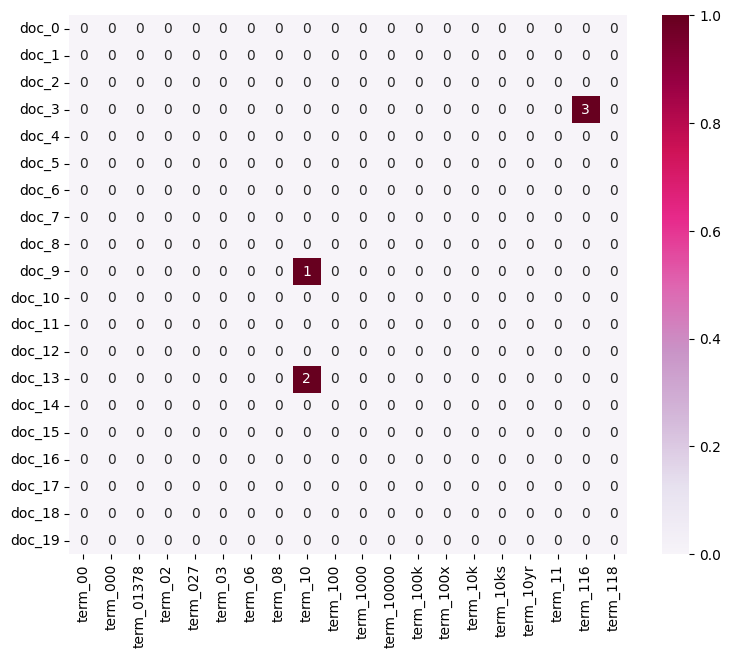

In [169]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 4.4 Attribute Transformation - Transform Text Data

- Compute **the sum of each column** in the document matrix

In [177]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [178]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [179]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

#### 4.4.1 Barplot with the first 100 terms frequencies

C:\Users\aska9\AppData\Local\Temp\ipykernel_35976\3617402877.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



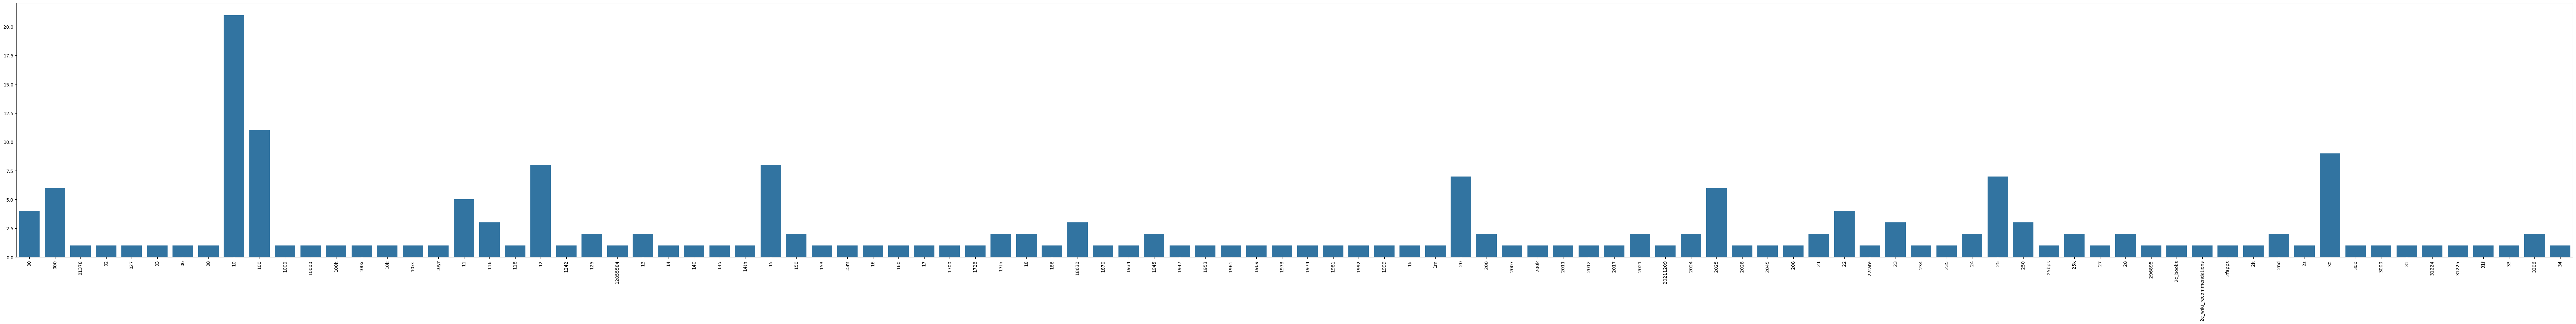

In [181]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

#### 4.4.2 Sort in **alphabetical order**
- use `plotly` to have a better visualization

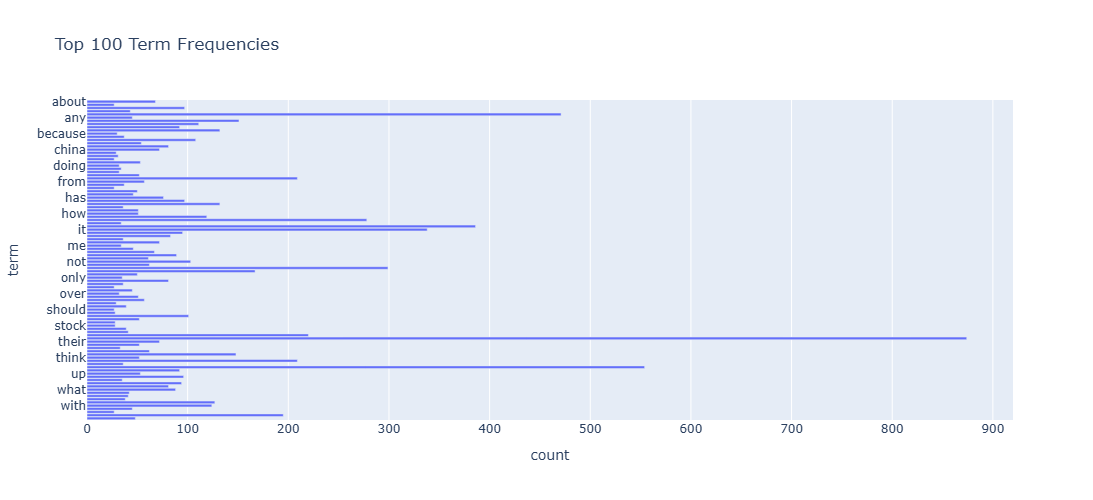

In [194]:
import plotly.express as px

# 1. compute the term frequency
term_counts = np.asarray(X_counts.sum(axis=0)).ravel()
feature_names = count_vect.get_feature_names_out()

# 2. build dataframe
df = pd.DataFrame({"term": feature_names, "count": term_counts})
df_top = df.sort_values("count", ascending=False).head(100)

# 3. plot barchart with plotly
fig = px.bar(df_top.sort_values("term"), 
             x="count", y="term",
             orientation="h",
             title="Top 100 Term Frequencies")

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.update_layout(height=500)
fig.show()

#### 4.4.3 Sort in **frequency order**
It turns out to be a **long tail**

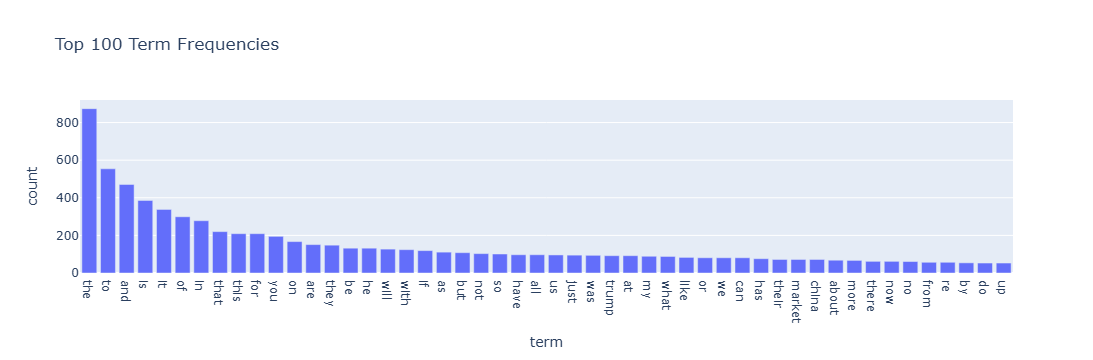

In [195]:
# Pick top 100 terms and sort them from large to small
df_top = df.sort_values("count", ascending=False).head(50)

fig = px.bar(df_top,
             x="term", y="count",
             title="Top 100 Term Frequencies")

# Ensure the order on x-axis is truly ordered by frequency instead of in alphabetical order
fig.update_xaxes(categoryorder='total descending')
fig.show()

#### 4.4.4 Use `log()` function to reconstruct the barplot

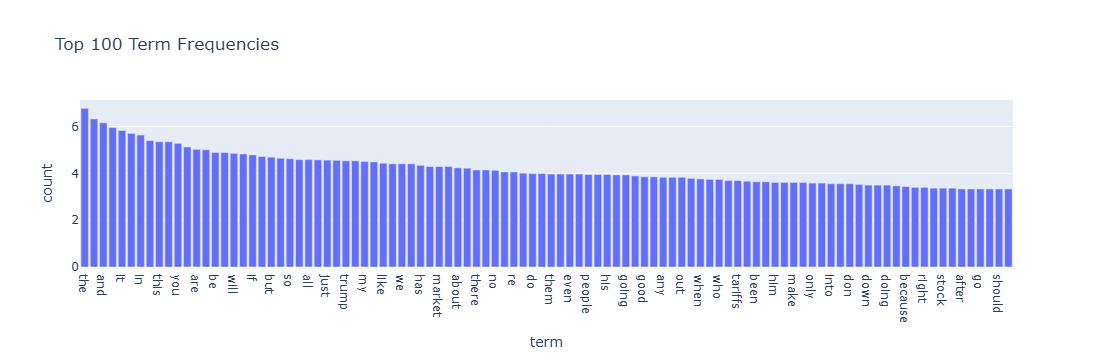

In [197]:
# log
term_counts_log = np.log1p(term_counts)
df = pd.DataFrame({"term": feature_names, "count": term_counts_log})
df_top = df.sort_values("count", ascending=False).head(100)

fig = px.bar(df_top,
             x="term", y="count",
             title="Top 100 Term Frequencies")

# Ensure the order on x-axis is truly ordered by frequency instead of in alphabetical order
fig.update_xaxes(categoryorder='total descending')
fig.show()

- Conclusion: After applying the log transformation, I found that **the difference between high-frequency and low-frequency terms becomes much smaller**, which makes the visualization **easier to read**.

# Phase 2

In [ ]:
### Begin Assignment Here